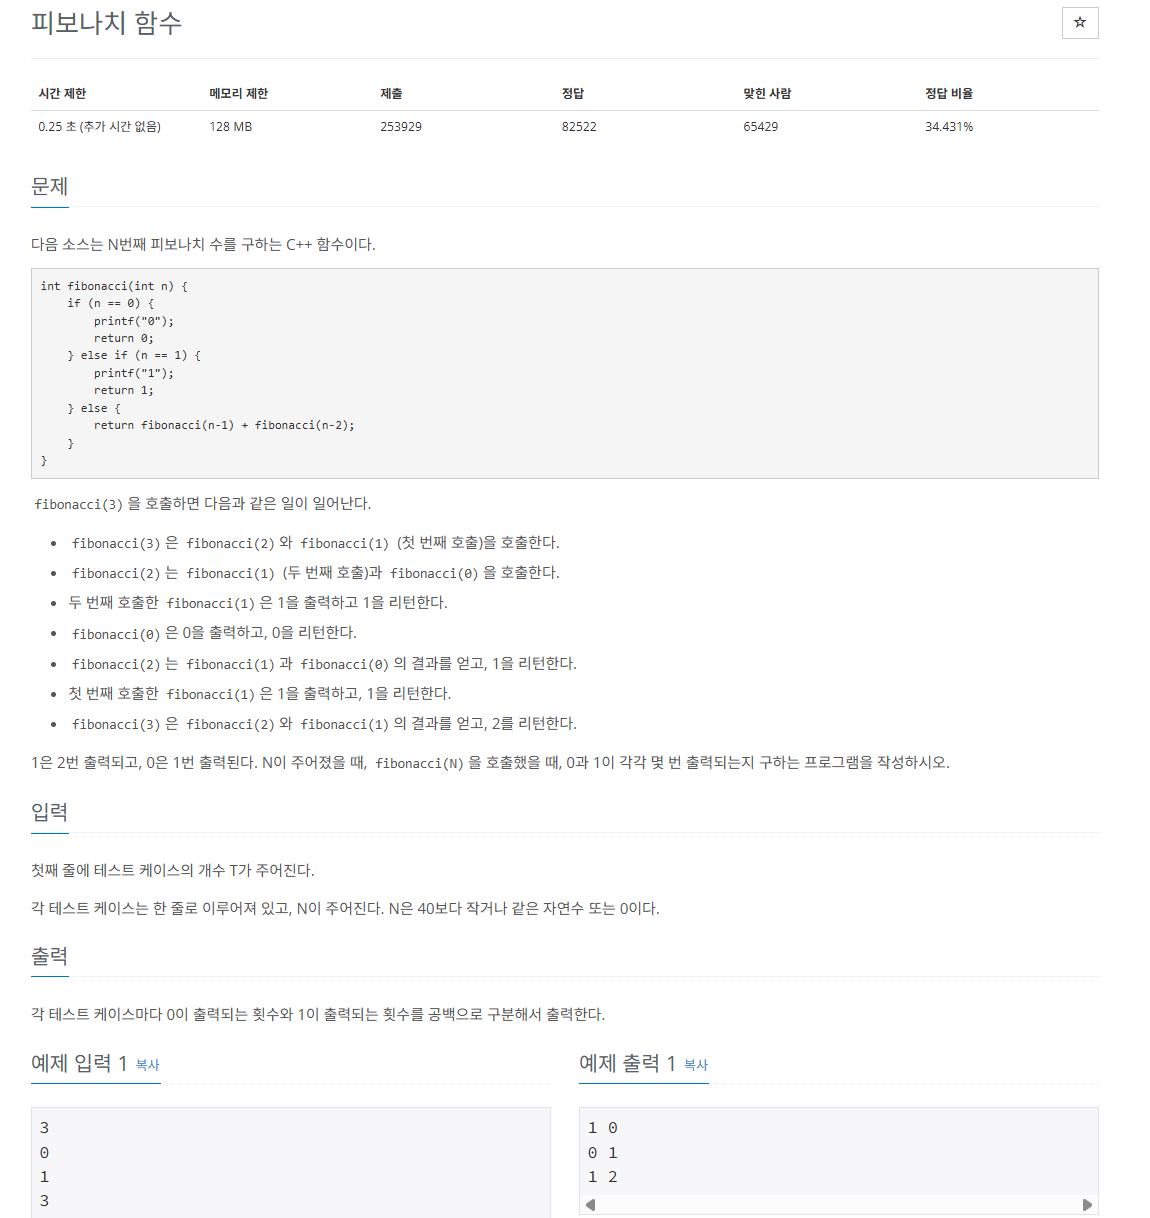

In [1]:
from PIL import Image
img=Image.open(r"C:\Users\Son\Pictures\Screenshots\스크린샷 2025-08-09 225407.png")
img

In [27]:
T = int(input())

for _ in range(T):
    n = int(input())
    zero = [0] * (n+2)
    one = [0] * (n+2)
    
    zero[0], one[0] = 1, 0
    zero[1], one[1] = 0, 1
    
    for i in range(2, n+1):
        zero[i] = zero[i-1] + zero[i-2]
        one[i] = one[i-1] + one[i-2]
    
    print(zero[n], one[n])


5 8
10946 17711


네, 아주 좋은 질문입니다. "왜 이게 DP(다이나믹 프로그래밍)지?"를 이해하는 것이 바로 이 문제의 핵심이자, DP라는 개념에 첫발을 내딛는 과정입니다. 제가 강의를 진행하듯이 차근차근 설명해 드리겠습니다.

-----

### \#\# 강의: 피보나치와 다이나믹 프로그래밍

이 알고리즘이 왜 DP인지, 그리고 그 원리가 무엇인지 알려면, 우리는 먼저 이 문제를 가장 **'멍청한'** 방법으로 풀어봐야 합니다.

#### **1단계: 가장 멍청한 방법 - 시키는 대로 다 해보기 (순수 재귀)**

문제에서 피보나치 함수는 이렇게 생겼습니다.
`fib(n) = fib(n-1) + fib(n-2)`

`fib(4)`를 구하려면 어떻게 될까요? 컴퓨터는 아래 그림처럼 생각합니다.

  * `fib(4)`를 구하기 위해 `fib(3)`과 `fib(2)`를 호출합니다.
  * `fib(3)`을 구하기 위해 `fib(2)`와 `fib(1)`을 호출합니다.
  * ...

**치명적인 문제점:** 보이시나요? `fib(2)`는 **두 번**이나 계산되고, `fib(1)`은 **세 번**이나 계산됩니다. `n`이 40 정도로 커지면, 컴퓨터는 똑같은 계산을 수억 번 반복하다가 시간 초과로 멈춰버릴 겁니다.

이처럼, 큰 문제를 풀기 위해 작은 문제들을 푸는데, 그 **작은 문제들이 계속해서 중복되는 현상**을 \*\*'중복되는 부분 문제(Overlapping Subproblems)'\*\*라고 부릅니다.

#### **2단계: 똑똑한 방법 - "한 번 푼 문제는 메모해두자\!" (DP의 시작)**

다이나믹 프로그래밍(동적 계획법)의 핵심 아이디어는 딱 한 문장으로 요약할 수 있습니다.

> **"한 번 계산한 결과는 어딘가에 저장(메모)해두고, 다음에 또 필요하면 계산하지 말고 그냥 꺼내 쓰자."**

이것이 바로 DP의 전부입니다.

#### **3단계: 사용자님의 코드가 바로 그 '똑똑한 방법'**

사용자님의 코드가 어떻게 이 아이디어를 구현했는지 살펴보죠.

```python
# 1. '메모장'을 준비한다. (DP 테이블)
zero = [0] * (n+2)
one = [0] * (n+2)

# 2. 가장 작은 문제의 답은 미리 적어둔다. (초기값)
zero[0], one[0] = 1, 0
zero[1], one[1] = 0, 1

# 3. 메모장을 채워나간다. (점화식)
for i in range(2, n+1):
    # i번째 문제의 답은, 이미 풀어놓은 i-1번째와 i-2번째 문제의 답을 보고 구한다.
    zero[i] = zero[i-1] + zero[i-2]
    one[i] = one[i-1] + one[i-2]
```

  * **'중복되는 부분 문제' 해결:** `zero[2]`를 계산할 때 `zero[1]`과 `zero[0]`을 사용합니다. 나중에 `zero[3]`을 계산할 때 `zero[2]`가 또 필요한데, 우리는 이걸 다시 계산하지 않고 그냥 **메모장(`zero` 리스트)에서 꺼내 쓰기만** 하면 됩니다. 멍청한 재귀처럼 똑같은 계산을 반복할 필요가 전혀 없죠.

  * **'최적 부분 구조(Optimal Substructure)' 만족:** `n`번째 문제의 답이 그보다 작은 문제들(`n-1`, `n-2`)의 답으로 완벽하게 구성될 수 있는 구조를 가지고 있습니다. 이것이 바로 DP가 적용될 수 있는 문제의 특징입니다.

-----

### \#\# 결론

이 문제가 DP인 이유는 다음과 같습니다.

1.  **중복되는 부분 문제:** 작은 문제들의 계산이 계속해서 반복된다.
2.  **최적 부분 구조:** 큰 문제의 답을 작은 문제들의 답을 이용해 구할 수 있다.

그리고 사용자님의 코드는 이 두 가지 특징을 완벽하게 활용하여, **가장 작은 문제부터 차례대로 답을 구해 '메모장(리스트)'에 기록**해 나가는 **Bottom-up 방식의 다이나믹 프로그래밍**을 훌륭하게 구현한 것입니다.